# Integrating data using ingest

The three age groups [young], [adult] and [aged] were integrated using [ingest] (https://scanpy.readthedocs.io/en/latest/api/scanpy.tl.ingest.html).

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.0.1
anndata             0.7.5
appnope             0.1.0
backcall            0.2.0
bottleneck          1.3.2
cairo               1.20.0
cffi                1.14.3
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2.30.0
dateutil            2.8.1
decorator           4.4.2
get_version         2.1
h5py                2.10.0
igraph              0.9.1
ipykernel           5.3.4
ipython_genutils    0.2.0
ipywidgets          7.5.1
jedi                0.17.1
joblib              0.17.0
kiwisolver          1.3.0
legacy_api_wrap     1.2
leidenalg           0.7.0
llvmlite            0.34.0
louvain             0.7.0
matplotlib          3.3.2
mkl                 2.3.0
mpl_toolkits        NA
natsort             7.1.1
numba               0.51.2
numexpr             2.7.1
numpy               1.19.2
packaging           20.

In [6]:
cd scanpy-tutorials-master

/Volumes/LaCie/PomLab/Python/scanpy-tutorials-master


## Integration

We consider an annotated reference dataset `adata_ref` and a dataset for which you want to query labels and embeddings `adata`.

In [7]:
adata_ref = sc.read('bkknn_corrected_young')

In [8]:
adata_adult = sc.read('bkknn_adult_small')
adata_aged = sc.read('bkknn_aged')

To use `sc.tl.ingest`, the datasets need to be defined on the same variables.

In [9]:
var_names = adata_ref.var_names.intersection(adata_adult.var_names)
adata_ref = adata_ref[:, var_names]
adata_adult = adata_adult[:, var_names]

The model and graph (here PCA, neighbors, UMAP) trained on the reference data will explain the biological variation observed within it.

In [10]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

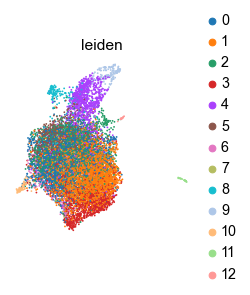

In [11]:
sc.pl.umap(adata_ref, color= ['leiden'])

### Mapping Hu-MuSCs using ingest

Let's map labels and embeddings from `adata_ref` to `adata` based on a chosen representation. Here, we use `adata_ref.obsm['X_pca']` to map cluster labels and the UMAP coordinates.

sc.tl.ingest(adata, adata_ref, obs='leiden')

In [12]:
sc.tl.ingest(adata_adult, adata_ref, obs='leiden')

In [13]:
adata_adult.uns['leiden_colors'] = adata_ref.uns['leiden_colors']  # fix colors

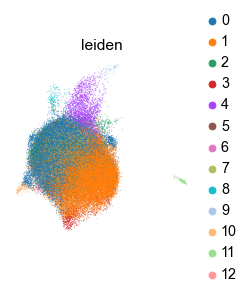

In [14]:
sc.pl.umap(adata_adult, color=['leiden'])

By comparing the 'bulk_labels' annotation with 'louvain', we see that the data has been reasonably mapped, only the annotation of dendritic cells seems ambiguous and might have been ambiiguous in `adata` already.

In [15]:
var_names = adata_ref.var_names.intersection(adata_aged.var_names)
adata_ref = adata_ref[:, var_names]
adata_aged = adata_aged[:, var_names]

In [16]:
sc.tl.ingest(adata_aged, adata_ref, obs='leiden')

In [17]:
adata_aged.uns['leiden_colors'] = adata_ref.uns['leiden_colors']  # fix colors

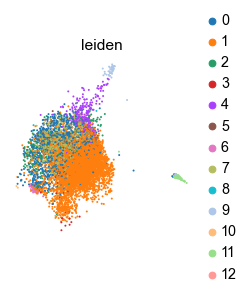

In [18]:
sc.pl.umap(adata_aged, color=['leiden'])

In [19]:
adata_concat = adata_ref.concatenate(adata_adult,adata_aged, batch_categories=['ref', 'adult', 'aged'])

In [20]:
adata_concat.obs.leiden = adata_concat.obs.leiden.astype('category')
adata_concat.obs.leiden.cat.reorder_categories(adata_ref.obs.leiden.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['leiden_colors'] = adata_ref.uns['leiden_colors']  # fix category colors

... storing 'age' as categorical
... storing 'muscle' as categorical
... storing 'sample' as categorical
... storing 'cell type' as categorical


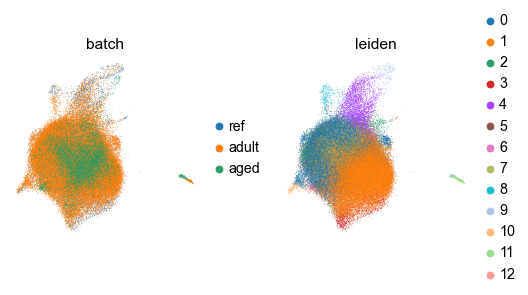

In [21]:
sc.pl.umap(adata_concat, color=['batch', 'leiden'])